<a href="https://colab.research.google.com/github/DEE-GEMSTONE/ADVENTURE_WORKS/blob/main/Week_5_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import sqlite3
path = "/content/sample_data/SalesTrend read.db"
conn = sqlite3.connect(path)
df = pd.read_sql_query("select * from Sales", conn)
print(df)


       OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0       1/1/2015  10/29/2001     SO45082         350        11455   
1       1/1/2015  11/16/2001     SO45081         338        26782   
2       1/1/2015   12/5/2001     SO45079         312        29255   
3       1/1/2015   9/21/2001     SO45080         332        14657   
4       1/1/2016  10/17/2002     SO48797         385        14335   
...          ...         ...         ...         ...          ...   
224179  9/9/2016    8/4/2003     SO54068         477        21453   
224180  9/9/2016    8/5/2003     SO54061         491        18584   
224181  9/9/2016    8/5/2003     SO54073         466        19460   
224182  9/9/2016    8/5/2003     SO54080         528        11843   
224183  9/9/2016    8/6/2003     SO54066         220        18170   

        TerritoryKey  OrderLineItem  OrderQuantity  
0                  9              1              1  
1                  6              1              1  
2           

In [ ]:
#normalization of the data
import pandas as pd
import sqlite3
from sklearn.preprocessing import MinMaxScaler
path = "/content/sample_data/SalesTrend read.db"
conn = sqlite3.connect(path)
df = pd.read_sql_query("select * from sales", conn)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
numerical_features = ['ProductKey']
df_numeric = df[numerical_features]
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_numeric)
df_normalized = pd.DataFrame(df_normalized, columns=numerical_features)
df_final = pd.concat([df.drop(numerical_features, axis=1), df_normalized], axis=1)
print(df_final)

        OrderDate   StockDate OrderNumber  CustomerKey  TerritoryKey  \
0      2015-01-01  10/29/2001     SO45082        11455             9   
1      2015-01-01  11/16/2001     SO45081        26782             6   
2      2015-01-01   12/5/2001     SO45079        29255             4   
3      2015-01-01   9/21/2001     SO45080        14657             1   
4      2016-01-01  10/17/2002     SO48797        14335             1   
...           ...         ...         ...          ...           ...   
224179 2016-09-09    8/4/2003     SO54068        21453             6   
224180 2016-09-09    8/5/2003     SO54061        18584             1   
224181 2016-09-09    8/5/2003     SO54073        19460             7   
224182 2016-09-09    8/5/2003     SO54080        11843             1   
224183 2016-09-09    8/6/2003     SO54066        18170             8   

        OrderLineItem  OrderQuantity  ProductKey  
0                   1              1    0.346939  
1                   1            

In [ ]:
# Tranformation of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)
df_standardized = pd.DataFrame(df_standardized, columns=numerical_features)
df_final = pd.concat([df.drop(numerical_features, axis=1), df_standardized], axis=1)
print(df_final)

        OrderDate   StockDate OrderNumber  CustomerKey  TerritoryKey  \
0      2015-01-01  10/29/2001     SO45082        11455             9   
1      2015-01-01  11/16/2001     SO45081        26782             6   
2      2015-01-01   12/5/2001     SO45079        29255             4   
3      2015-01-01   9/21/2001     SO45080        14657             1   
4      2016-01-01  10/17/2002     SO48797        14335             1   
...           ...         ...         ...          ...           ...   
224179 2016-09-09    8/4/2003     SO54068        21453             6   
224180 2016-09-09    8/5/2003     SO54061        18584             1   
224181 2016-09-09    8/5/2003     SO54073        19460             7   
224182 2016-09-09    8/5/2003     SO54080        11843             1   
224183 2016-09-09    8/6/2003     SO54066        18170             8   

        OrderLineItem  OrderQuantity  ProductKey  
0                   1              1   -0.750031  
1                   1            

In [ ]:
!pip install pandera==0.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install pandera==0.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pandera as pa
conn = sqlite3.connect(path)
data = pd.read_sql_query("SELECT * FROM Sales", conn)
# Convert 'OrderDate' and 'StockDate' to datetime
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['StockDate'] = pd.to_datetime(data['StockDate'])
schema = pa.DataFrameSchema({
     "OrderDate": pa.Column(pa.DateTime),
    "StockDate": pa.Column(pa.DateTime),
    "OrderNumber": pa.Column(pa.String),
    "ProductKey": pa.Column(pa.Int),
    "CustomerKey": pa.Column(pa.Int),
    "TerritoryKey": pa.Column(pa.Int),
    "OrderLineItem": pa.Column(pa.Int),
    "OrderQuantity": pa.Column(pa.Int)
})
schema.validate(data)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2015-01-01,2001-10-29,SO45082,350,11455,9,1,1
1,2015-01-01,2001-11-16,SO45081,338,26782,6,1,1
2,2015-01-01,2001-12-05,SO45079,312,29255,4,1,1
3,2015-01-01,2001-09-21,SO45080,332,14657,1,1,1
4,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1
...,...,...,...,...,...,...,...,...
224179,2016-09-09,2003-08-04,SO54068,477,21453,6,3,2
224180,2016-09-09,2003-08-05,SO54061,491,18584,1,2,1
224181,2016-09-09,2003-08-05,SO54073,466,19460,7,2,2
224182,2016-09-09,2003-08-05,SO54080,528,11843,1,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224184 entries, 0 to 224183
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   OrderDate      224184 non-null  datetime64[ns]
 1   StockDate      224184 non-null  object        
 2   OrderNumber    224184 non-null  object        
 3   ProductKey     224184 non-null  int64         
 4   CustomerKey    224184 non-null  int64         
 5   TerritoryKey   224184 non-null  int64         
 6   OrderLineItem  224184 non-null  int64         
 7   OrderQuantity  224184 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 13.7+ MB


<ipython-input-7-778e3ecbcc07>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').sum()


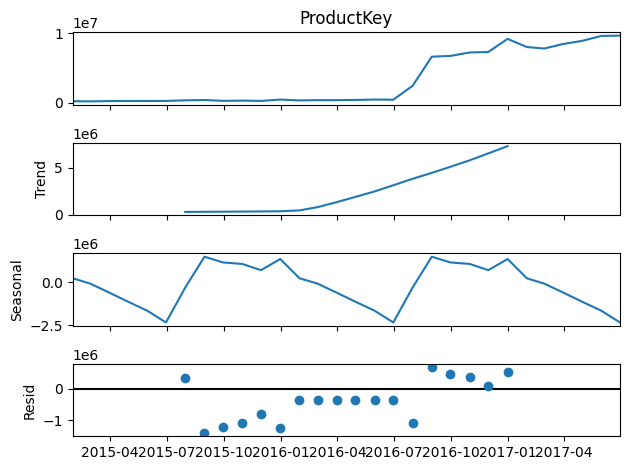

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import sqlite3

path = "/content/sample_data/SalesTrend read.db" # This is the path to the database file
conn = sqlite3.connect(path)
df = pd.read_sql_query("SELECT * FROM Sales", conn) # Select all columns from the table SalesTrend

# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Set 'OrderDate' as index
df = df.set_index('OrderDate')

# Resample data to monthly frequency and sum the values
df_resampled = df.resample('M').sum()

# Perform seasonal decomposition
result = seasonal_decompose(df_resampled['ProductKey'], model='additive')

# Plot the decomposed components
result.plot()
plt.show()



In [ ]:
import pandas as pd
import sqlite3

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"
conn = sqlite3.connect(path)

# Read data from the Sales table
df = pd.read_sql_query("SELECT * FROM Sales", conn)

# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Filter data for 2015, July 2016, and September 2017
df_filtered = df[
    (df['OrderDate'].dt.year == 2015) |
    ((df['OrderDate'].dt.year == 2016) & (df['OrderDate'].dt.month == 7)) |
    ((df['OrderDate'].dt.year == 2017) & (df['OrderDate'].dt.month == 9))
]

# Calculate total sales for each product and region
df_sales = df_filtered.groupby(['ProductKey', 'TerritoryKey'])['OrderQuantity'].sum().reset_index()

# Find top-performing product
top_product = df_sales.loc[df_sales['OrderQuantity'].idxmax()]

# Find top-performing region
top_region = df_sales.loc[df_sales['OrderQuantity'].idxmax()]

# Print results
print("Top performing product:")
print(top_product)

print("\nTop performing region:")
print(top_region)

# Close connection
conn.close()

Top performing product:
ProductKey       477
TerritoryKey       9
OrderQuantity    256
Name: 375, dtype: int64

Top performing region:
ProductKey       477
TerritoryKey       9
OrderQuantity    256
Name: 375, dtype: int64


In [ ]:
!pip install pandas scikit-learn

In [ ]:
import pandas as pd
import sqlite3
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"  # Replace with your actual path
conn = sqlite3.connect(path)

# Load the Sales and Customer tables
sales_df = pd.read_sql_query("SELECT * FROM Sales", conn)
customer_df = pd.read_sql_query("SELECT * FROM DimCustomer", conn)
# Merge the dataframes on CustomerKey, include all columns from customer_df
merged_df = pd.merge(sales_df, customer_df, on='CustomerKey', how='left')

# Convert 'OrderDate' to datetime if needed
merged_df['OrderDate'] = pd.to_datetime(merged_df['OrderDate'])

# 1. Basic Demographic Analysis
# ---------------------------
# Analyze customer demographics (e.g., age, gender, location)
print(merged_df['Gender'].value_counts())
print(merged_df['MaritalStatus'].value_counts())

#Check the column names available in merged_df
print(merged_df.columns)
# Use the correct column name for Yearly Income - it is 'YearlyIncome'
print(merged_df['YearlyIncome'].describe())

# 2. Purchasing Patterns
# ---------------------
# Analyze purchase frequency, average order value, etc.
# Calculate total sales per customer
customer_sales = merged_df.groupby('CustomerKey')['OrderQuantity'].sum()
print(customer_sales.describe())

# 3. Customer Segmentation with K-means
# -------------------------------------
# Prepare data for clustering (e.g., standardize numerical features)
features = ['YearlyIncome', 'TotalChildren']
X = merged_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Experiment with different numbers of clusters
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze customer behavior within each cluster
print(merged_df.groupby('Cluster')['YearlyIncome', 'TotalChildren', 'OrderQuantity'].mean())

# Close the connection
conn.close()



Gender
M     112284
F     110380
NA      1520
Name: count, dtype: int64
MaritalStatus
M    123396
S    100788
Name: count, dtype: int64
Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity', 'Prefix', 'FirstName',
       'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress',
       'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation',
       'HomeOwner'],
      dtype='object')


KeyError: 'YearlyIncome'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import sqlite3

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"  # Replace with your actual path
conn = sqlite3.connect(path)

# Load the Sales table
sales_df = pd.read_sql_query("SELECT * FROM Sales", conn)

# Convert 'OrderDate' to datetime
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])

# 1. Product Lifecycle Analysis
# -----------------------------

# Group by ProductKey and resample to monthly frequency
product_sales = sales_df.groupby('ProductKey').resample('M', on='OrderDate')['OrderQuantity'].sum()

# Example: Analyze lifecycle of a specific product
product_key = 310  # Replace with the desired ProductKey
product_lifecycle = product_sales[product_key]

# Plot

<ipython-input-9-d6ad8b09a87e>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  product_sales = sales_df.groupby('ProductKey').resample('M', on='OrderDate')['OrderQuantity'].sum()


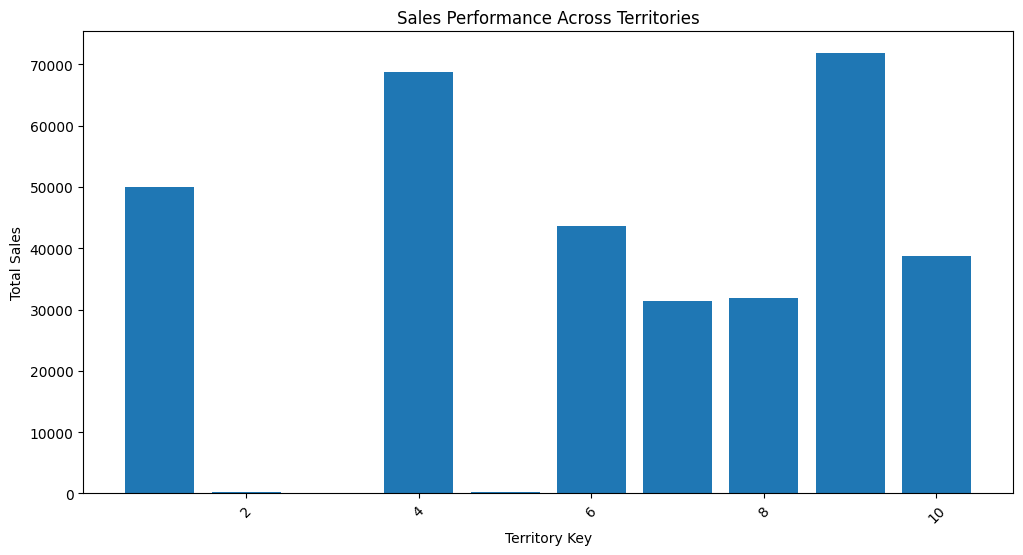

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"  # Replace with your actual path
conn = sqlite3.connect(path)

# Load the Sales table
sales_df = pd.read_sql_query("SELECT * FROM Sales", conn)

# 1. Calculate Total Sales per Territory
# -------------------------------------

# Group by TerritoryKey and sum OrderQuantity
territory_sales = sales_df.groupby('TerritoryKey')['OrderQuantity'].sum()

# 2. Visualize Sales Performance
# -------------------------------

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(territory_sales.index, territory_sales.values)
plt.title('Sales Performance Across Territories')
plt.xlabel('Territory Key')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# 3.

In [8]:
import pandas as pd
import sqlite3
from scipy.stats import pearsonr
import statsmodels.formula.api as sm

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"
conn = sqlite3.connect(path)

# Load the Sales table
sales_df = pd.read_sql_query("SELECT * FROM Sales", conn)

# Convert 'OrderDate' to datetime
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])

# Create a DataFrame with external factors data (replace with your actual data)
# Ensure the 'Date' column has overlapping values with the 'OrderDate' column in sales_df
economic_df = pd.DataFrame({
    'Date': pd.to_datetime(sales_df['OrderDate'].unique()[:4]),  # Use the first 4 unique dates from sales_df for demonstration
    'InterestRate': [0.05, 0.06, 0.055, 0.07],
    'InflationRate': [0.02, 0.025, 0.022, 0.03]
})

# Merge sales data with external factors data
merged_df = pd.merge(sales_df, economic_df, left_on='OrderDate', right_on='Date')

# 1. Correlation Analysis
# ------------------------

# Calculate correlation between sales and interest rates
correlation, p_value = pearsonr(merged_df['OrderQuantity'], merged_df['InterestRate'])
print(f"Correlation between Sales and Interest Rate: {correlation:.2f}")

# 2. Regression Analysis
# ----------------------

# Build a regression model
model = sm.ols('OrderQuantity ~ InterestRate + InflationRate', data=merged_df)
results = model.fit()
print(results.summary())

# Close the connection
conn.close()

Correlation between Sales and Interest Rate: -0.20
                            OLS Regression Results                            
Dep. Variable:          OrderQuantity   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     33.09
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           3.85e-14
Time:                        12:40:01   Log-Likelihood:                -356.28
No. Observations:                 456   AIC:                             718.6
Df Residuals:                     453   BIC:                             730.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [10]:
import scipy.stats as stats

# Example: T-test to compare sales in two territories
territory1_sales = df[df['TerritoryKey'] == 1]['OrderQuantity']
territory2_sales = df[df['TerritoryKey'] == 2]['OrderQuantity']
t_statistic, p_value = stats.ttest_ind(territory1_sales, territory2_sales)

# Example: Correlation between sales and interest rates
correlation, p_value = stats.pearsonr(merged_df['OrderQuantity'], merged_df['InterestRate'])

In [11]:
import pandas as pd
import sqlite3
from scipy.stats import pearsonr

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"
conn = sqlite3.connect(path)

# Load the Sales table
sales_df = pd.read_sql_query("SELECT * FROM Sales", conn)

# Convert 'OrderDate' to datetime
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])

# Select numerical features for correlation analysis
numerical_features = ['ProductKey', 'CustomerKey', 'TerritoryKey', 'OrderLineItem', 'OrderQuantity']
sales_numeric_df = sales_df[numerical_features]

# Calculate correlation matrix
correlation_matrix = sales_numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Example: Correlation between OrderQuantity and ProductKey
correlation, p_value = pearsonr(sales_df['OrderQuantity'], sales_df['ProductKey'])
print(f"Correlation between OrderQuantity and ProductKey: {correlation:.2f} (p-value: {p_value:.3f})")

# Close the connection
conn.close()

               ProductKey  CustomerKey  TerritoryKey  OrderLineItem  \
ProductKey       1.000000     0.057347     -0.024334      -0.261316   
CustomerKey      0.057347     1.000000     -0.038361      -0.016089   
TerritoryKey    -0.024334    -0.038361      1.000000      -0.005817   
OrderLineItem   -0.261316    -0.016089     -0.005817       1.000000   
OrderQuantity    0.285701     0.023743     -0.022569       0.142036   

               OrderQuantity  
ProductKey          0.285701  
CustomerKey         0.023743  
TerritoryKey       -0.022569  
OrderLineItem       0.142036  
OrderQuantity       1.000000  
Correlation between OrderQuantity and ProductKey: 0.29 (p-value: 0.000)


In [12]:
import pandas as pd
import sqlite3
import statsmodels.formula.api as sm

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"
conn = sqlite3.connect(path)

# Load the Sales table
sales_df = pd.read_sql_query("SELECT * FROM Sales", conn)

# Convert 'OrderDate' to datetime
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])

# Define the independent and dependent variables
# You can adjust these to include other relevant features
independent_vars = ['ProductKey', 'TerritoryKey']
dependent_var = 'OrderQuantity'

# Build the regression model
formula = dependent_var + ' ~ ' + ' + '.join(independent_vars)
model

In [13]:
import pandas as pd
import sqlite3
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

# Connect to the database
path = "/content/sample_data/SalesTrend read.db"
conn = sqlite3.connect(path)

# Load the Sales table
sales_df = pd.read_sql_query("SELECT * FROM Sales", conn)

# Convert 'OrderDate' to datetime (if needed)
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])

# Define the dependent and independent variables
dependent_var = 'OrderQuantity'
independent_var = 'TerritoryKey'

In [14]:
import pandas as pd
import sqlite3
import statsmodels.formula.api as sm

# ... (connect to database and load data as before) ...

# Define the independent and dependent variables
independent_vars = ['ProductKey', 'TerritoryKey', 'CustomerKey']
dependent_var = 'OrderQuantity'

# Build the regression model
formula = dependent_var + ' ~ ' + ' + '.join(independent_vars)
model = sm.ols(formula, data=sales_df)
results = model.fit()

# Print the regression results summary
print(results.summary())

# ... (close connection) ...

                            OLS Regression Results                            
Dep. Variable:          OrderQuantity   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     6667.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:54:53   Log-Likelihood:            -1.9858e+05
No. Observations:              224184   AIC:                         3.972e+05
Df Residuals:                  224180   BIC:                         3.972e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8615      0.007    125.181   

In [19]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis

# ... (connect to database and load data as before) ...

# Assuming sales_numeric_df contains the relevant variables for factor analysis
data = sales_numeric_df

# Perform factor analysis
fa = FactorAnalysis(n_components=2)  # Adjust the number of components as needed
fa.fit(data)

# Get the factor loadings
loadings = fa.components_

# ... (interpret the loadings to understand the factors) ...

<ipython-input-16-4a57bcd0f645>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = sales_df.resample('M').sum()


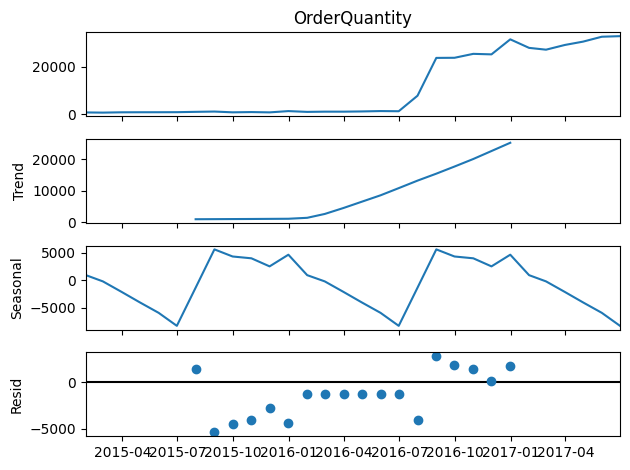

In [16]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# ... (load data and convert 'OrderDate' to datetime) ...

# Set 'OrderDate' as index
sales_df = sales_df.set_index('OrderDate')

# Resample data to monthly frequency and sum the values
df_resampled = sales_df.resample('M').sum()

# Perform seasonal decomposition
result = seasonal_decompose(df_resampled['OrderQuantity'], model='additive')

# Plot the decomposed components
result.plot()
plt.show()

In [20]:
import pandas as pd
from sklearn.cluster import KMeans

# ... (load data and select relevant features) ...

# Assuming 'sales_df' contains the relevant features for clustering
# and you want to use all numeric features you can select them:
data = sales_df.select_dtypes(include=['number'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_

# ... (analyze the characteristics of each cluster) ...